# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)
df=pd.DataFrame(sensor)

Examine the data using the `head` function.

In [3]:
# Your code here:
df.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
attitude.roll,attitude.roll,0.0
attitude.pitch,attitude.pitch,0.0
attitude.yaw,attitude.yaw,0.0
gravity.x,gravity.x,0.0
gravity.y,gravity.y,0.0
gravity.z,gravity.z,0.0
rotationRate.x,rotationRate.x,0.0
rotationRate.y,rotationRate.y,0.0
rotationRate.z,rotationRate.z,0.0
userAcceleration.x,userAcceleration.x,0.0


How many rows and columns are in our data?

In [5]:
# Your code here:
sensor.shape
#(Rows,Columns)

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:
time_series = pd.date_range(start="2015-04-01 01:00:00", end="1/1/2018 00:29:10", periods=1751)
time_series

DatetimeIndex([       '2015-04-01 01:00:00', '2015-04-01 14:47:46.600000',
               '2015-04-02 04:35:33.200000', '2015-04-02 18:23:19.800000',
               '2015-04-03 08:11:06.400000',        '2015-04-03 21:58:53',
               '2015-04-04 11:46:39.600000', '2015-04-05 01:34:26.200000',
               '2015-04-05 15:22:12.800000', '2015-04-06 05:09:59.400000',
               ...
               '2017-12-26 20:19:10.600000', '2017-12-27 10:06:57.200000',
               '2017-12-27 23:54:43.800000', '2017-12-28 13:42:30.400000',
                      '2017-12-29 03:30:17', '2017-12-29 17:18:03.600000',
               '2017-12-30 07:05:50.200000', '2017-12-30 20:53:36.800000',
               '2017-12-31 10:41:23.400000',        '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [7]:
# Your code here:
new_df = df.set_index(time_series)
new_df.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2015-04-01 01:00:00.000,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2015-04-01 14:47:46.600,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2015-04-02 04:35:33.200,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2015-04-02 18:23:19.800,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2015-04-03 08:11:06.400,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [8]:
import statsmodels.api as sm

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


Figure(432x288)


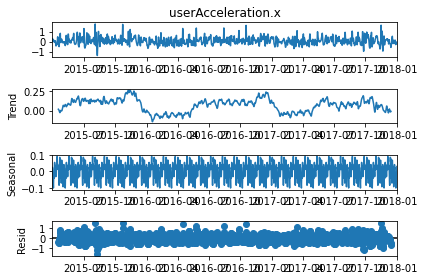

In [11]:
# Your code here:
res = sm.tsa.seasonal_decompose(new_df["userAcceleration.x"], freq=60)
print(res.plot())

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


Figure(432x288)


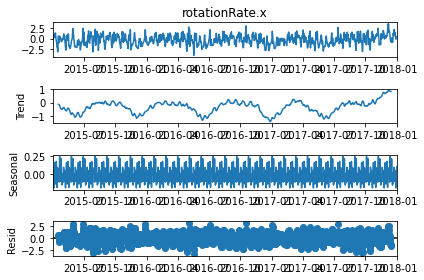

In [12]:
res = sm.tsa.seasonal_decompose(new_df["rotationRate.x"], freq=60)
print(res.plot())

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

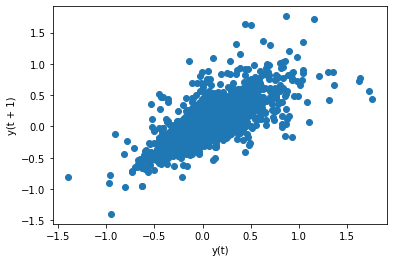

In [15]:
# Your code here:
import matplotlib.pyplot as plt
plt.figure()
pd.plotting.lag_plot(new_df["userAcceleration.x"])

Create a lag plot for `rotationRate.x`

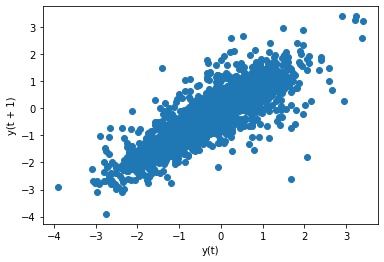

In [16]:
# Your code here:
plt.figure()
pd.plotting.lag_plot(new_df["rotationRate.x"])

What are your conclusions from both visualizations?

Your conclusions here:
Data is not random because values are quite condensed

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [17]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

q = new_df._get_numeric_data()
print([(col,stationaryCheck(q[col])) for col in q.columns])
stationaryCheck(np.random.random(100))

[('attitude.roll', 'Stationary'), ('attitude.pitch', 'Not-Stationary'), ('attitude.yaw', 'Stationary'), ('gravity.x', 'Not-Stationary'), ('gravity.y', 'Not-Stationary'), ('gravity.z', 'Stationary'), ('rotationRate.x', 'Stationary'), ('rotationRate.y', 'Stationary'), ('rotationRate.z', 'Stationary'), ('userAcceleration.x', 'Stationary'), ('userAcceleration.y', 'Stationary'), ('userAcceleration.z', 'Stationary')]


'Stationary'

What are your conclusions from this test?

In [13]:
# Your conclusions here:



Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [24]:
# Your code here:
dr = new_df.index

#Datos
realidad = new_df.loc[dr[0:1741]]
futuro = new_df.loc[dr[1741:]]

from statsmodels.tsa.arima_model import ARMA
predictions = dict()

for col in new_df.columns:
    train = realidad["userAcceleration.x"]
    test = futuro["userAcceleration.x"]

    # Entrena el modelo ARMA
    model = ARMA(train, (2,1))
    print(f"Entrenando con los datos desde la serie {col}")
    model_fit = model.fit(maxlag=10)
    
     # Predice los valores ARMA
    predictions["userAcceleration.x"] = model_fit.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)
    
   
pred = pd.DataFrame(predictions)
pred

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie attitude.roll


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie attitude.pitch


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie attitude.yaw


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie gravity.x


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie gravity.y


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie gravity.z


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie rotationRate.x


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie rotationRate.y


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie rotationRate.z


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie userAcceleration.x


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie userAcceleration.y


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 49666600L will be used.
  % freq, ValueWarning)


Entrenando con los datos desde la serie userAcceleration.z


,userAcceleration.x
2017-12-26 20:19:10.600,0.173148
2017-12-27 10:06:57.200,0.142896
2017-12-27 23:54:43.800,0.100522
2017-12-28 13:42:30.400,0.070106
2017-12-29 03:30:17.000,0.056099
2017-12-29 17:18:03.600,0.053778
2017-12-30 07:05:50.200,0.056790
2017-12-30 20:53:36.800,0.060646
2017-12-31 10:41:23.400,0.063316
2018-01-01 00:29:10.000,0.064493


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:

